<a href="https://colab.research.google.com/github/Steel3264/AI/blob/main/AI_W4_25_2_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# pip install scikit-fuzzy

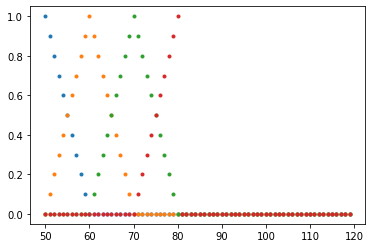

In [8]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
x = np.arange(50,120,1)
slow = fuzz.trimf(x,[50,50,60])
plt.figure()
plt.plot(x, slow, '.', linewidth = 1.5, label = 'slow')
medium = fuzz.trimf(x,[50,60,70])
plt.plot(x, medium, '.', linewidth = 1.5, label = 'medium')
medium_fast = fuzz.trimf(x,[60,70,80])
plt.plot(x, medium_fast, '.', linewidth = 1.5, label = 'medium_fast')
full_speed = fuzz.trimf(x,[70, 80,80])
plt.plot(x, full_speed, '.', linewidth = 1.5, label = 'full_speed')



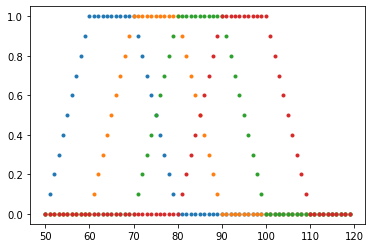

In [9]:
slow = fuzz.trapmf(x,[50,60,70,80])
plt.plot(x, slow, '.', linewidth = 1.5, label = 'slow')
medium = fuzz.trapmf(x,[60,70,80,90])
plt.plot(x, medium, '.', linewidth = 1.5, label = 'medium')
medium_fast = fuzz.trapmf(x,[70,80,90,100])
plt.plot(x, medium_fast, '.', linewidth = 1.5, label = 'medium_fast')
full_speed = fuzz.trapmf(x,[80, 90,100,110])
plt.plot(x, full_speed, '.', linewidth = 1.5, label = 'full_speed')

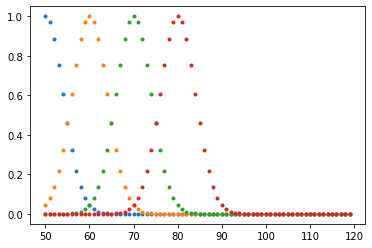

In [10]:
slow = fuzz.gaussmf(x,50,4)
plt.plot(x, slow, '.', linewidth = 1.5, label = 'slow')
medium = fuzz.gaussmf(x,60,4)
plt.plot(x, medium, '.', linewidth = 1.5, label = 'medium')
medium_fast = fuzz.gaussmf(x,70,4)
plt.plot(x, medium_fast, '.', linewidth = 1.5, label = 'medium_fast')
full_speed = fuzz.gaussmf(x, 80, 4)
plt.plot(x, full_speed, '.', linewidth = 1.5, label = 'full_speed')

39.999999999999986


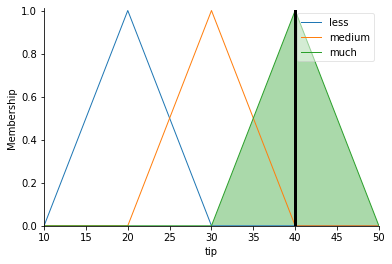

In [23]:
food = ctrl.Antecedent(np.arange(0,11,1), 'food')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(10,51,1), 'tip')

food['poor'] = fuzz.trimf(food.universe, [0,0,5])
food['average'] = fuzz.trimf(food.universe, [0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])
service['poor'] = fuzz.trimf(service.universe, [0,0,5])
service['average'] = fuzz.trimf(service.universe, [0,5,10])
service['good'] = fuzz.trimf(service.universe, [5,10,10])
tip['less'] = fuzz.trimf(tip.universe, [10,20,30])
tip['medium'] = fuzz.trimf(tip.universe, [20,30,40])
tip['much'] = fuzz.trimf(tip.universe, [30,40,50])

# food.view()
# service.view()
# tip.view()
# service['average'].view()

rule1 = ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'],tip['medium'])
rule4 = ctrl.Rule(food['average'] & service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'],tip['medium'])
rule6 = ctrl.Rule(food['average'] & service['good'],tip['much'])
rule7 = ctrl.Rule(food['good'] & service['poor'],tip['medium'])
rule8 = ctrl.Rule(food['good'] & service['average'],tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food'] = 50
tipping.input['service'] = 20
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

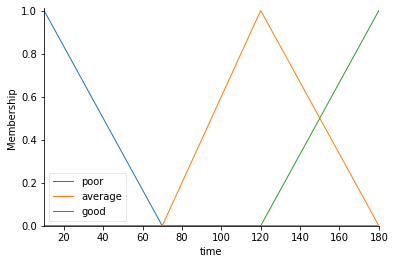

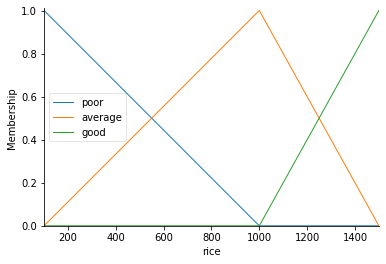

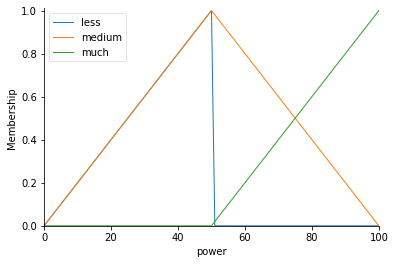

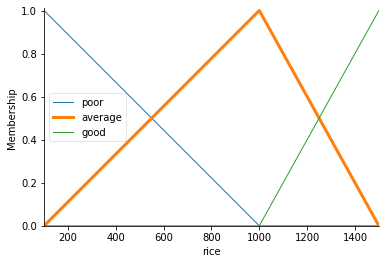

In [18]:
time = ctrl.Antecedent(np.arange(10,181,1), 'time')
rice = ctrl.Antecedent(np.arange(100,1501,1), 'rice')
power = ctrl.Consequent(np.arange(0,101,1), 'power')

time['poor'] = fuzz.trimf(time.universe, [10,10,70])
time['average'] = fuzz.trimf(time.universe, [70,120,180])
time['good'] = fuzz.trimf(time.universe, [120,180,180])
rice['poor'] = fuzz.trimf(rice.universe, [100,100,1000])
rice['average'] = fuzz.trimf(rice.universe, [100,1000,1500])
rice['good'] = fuzz.trimf(rice.universe, [1000,1500,1500])
power['less'] = fuzz.trimf(power.universe, [0,50,50])
power['medium'] = fuzz.trimf(power.universe, [0,50,100])
power['much'] = fuzz.trimf(power.universe, [50,100,100])

time.view()
rice.view()
power.view()
rice['average'].view()

# rule1 = ctrl.Rule(food['poor'] & service['poor'],tip['less'])
# rule2 = ctrl.Rule(food['poor'] & service['average'],tip['less'])
# rule3 = ctrl.Rule(food['poor'] & service['good'],tip['medium'])
# rule4 = ctrl.Rule(food['average'] & service['poor'],tip['less'])
# rule5 = ctrl.Rule(food['average'] & service['average'],tip['medium'])
# rule6 = ctrl.Rule(food['average'] & service['good'],tip['much'])
# rule7 = ctrl.Rule(food['good'] & service['poor'],tip['medium'])
# rule8 = ctrl.Rule(food['good'] & service['average'],tip['medium'])
# rule9 = ctrl.Rule(food['good'] & service['good'],tip['much'])

# tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
# tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# tipping.input['food'] = 50
# tipping.input['service'] = 50
# tipping.compute()
# print(tipping.output['tip'])
# tip.view(sim = tipping)